In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
df = pd.read_csv("/content/water-quality-nooutliers.csv")

In [3]:
#MLR analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [4]:
target = 'Temperature'
predictors = [
    'pH', 'DO', 'Conductivity',
    'Total_N', 'Total_P']


In [5]:
X = sm.add_constant(df[predictors])
y = df[target]
mlr = sm.OLS(y, X).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                 2.989e+04
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:51:52   Log-Likelihood:            -1.0167e+05
No. Observations:              138981   AIC:                         2.034e+05
Df Residuals:                  138975   BIC:                         2.034e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0402      0.002     23.505   

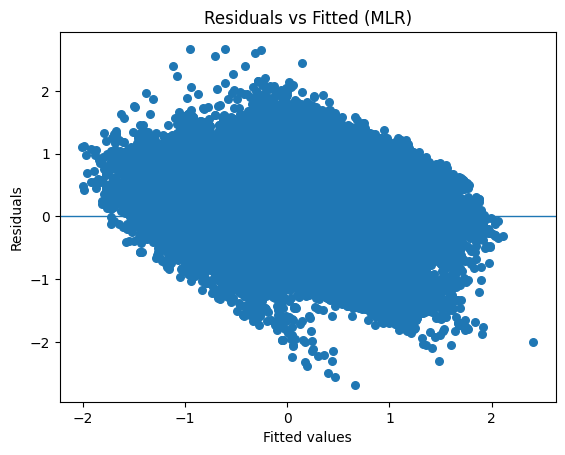

In [6]:
#residuals
fitted = mlr.fittedvalues
resid = mlr.resid

plt.figure()
plt.scatter(fitted, resid, s=30)
plt.axhline(0, linewidth=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (MLR)"); plt.show()

In [7]:
df["WQI"] = (
    df['pH'] * .17 +
    df['DO'] * .26 +
    df['Conductivity'] * .11 +
    df['Temperature'] * .15 +
    df['Total_N'] * .15 +
    df['Total_P'] * .15
)

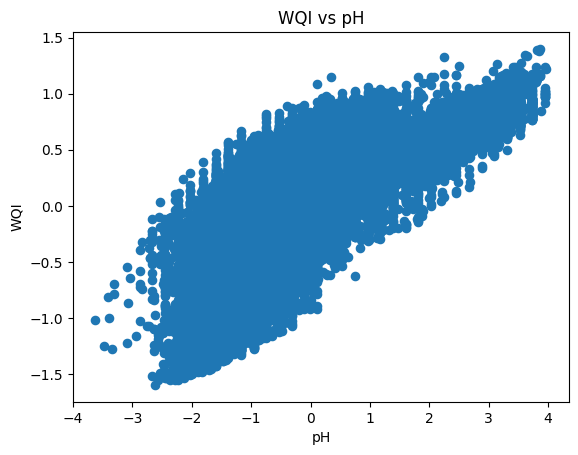

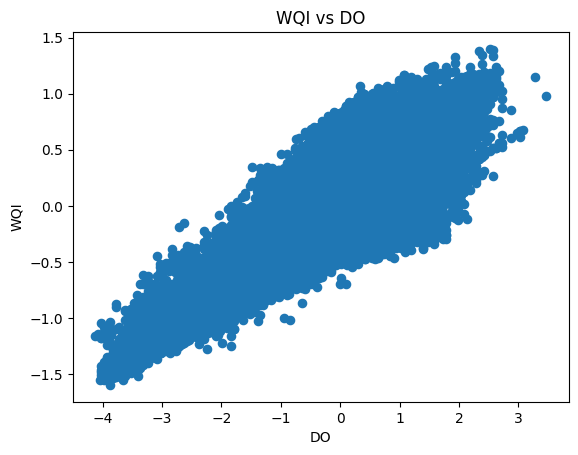

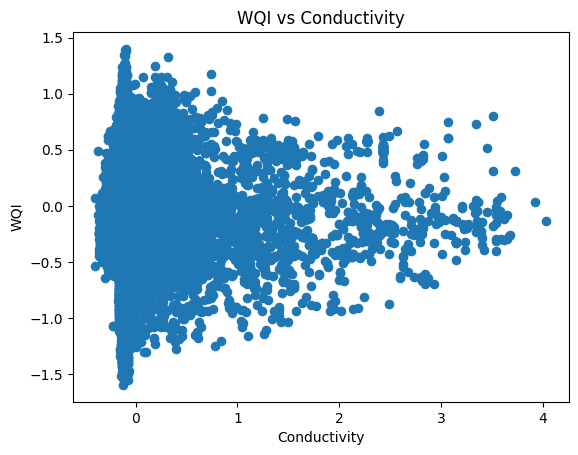

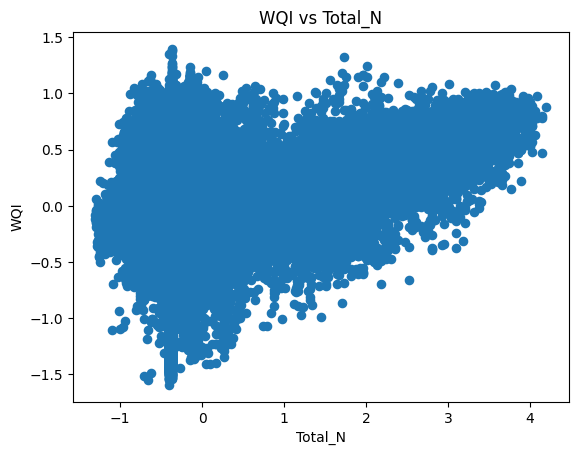

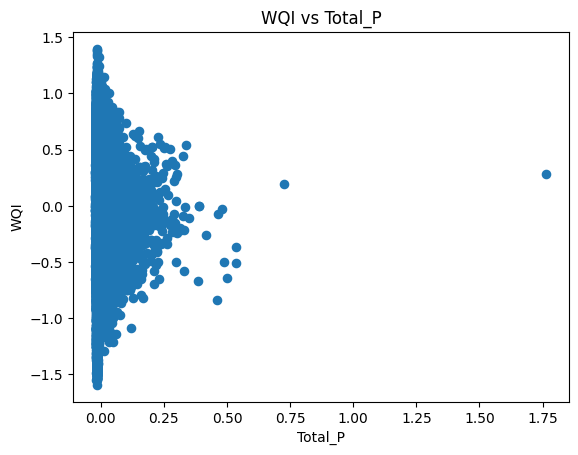

In [8]:
target = "WQI"
predictors = ["pH", "DO", "Conductivity", "Total_N", "Total_P"]

for col in predictors:
    plt.figure()
    plt.scatter(df[col], df[target], s=35)
    plt.xlabel(col); plt.ylabel(target)
    plt.title(f"{target} vs {col}")
    plt.show()


In [9]:
X = sm.add_constant(df[predictors])
y = df[target]
mlr = sm.OLS(y, X).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    WQI   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 6.459e+05
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:51:55   Log-Likelihood:             1.6199e+05
No. Observations:              138981   AIC:                        -3.240e+05
Df Residuals:                  138975   BIC:                        -3.239e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0060      0.000     23.505   

In [10]:
b = mlr.params
print("Fitted MLR equation:")
print(f"{target} = "
       f"{b['const']:.3f} + "
       #f"{b['Temperature']:.3f}*Temperature + "
       f"{b['Total_N']:.3f}*Total_N + "
       f"{b['pH']:.3f}*pH + "
       f"{b['DO']:.3f}*DO + "
       f"{b['Total_P']:.3f}*Total_P"
       f"{b['Conductivity']:.3f}*Conductivity")

Fitted MLR equation:
WQI = 0.006 + 0.136*Total_N + 0.247*pH + 0.192*DO + 0.375*Total_P0.153*Conductivity


In [11]:
coef_table = pd.DataFrame({
     "term": mlr.params.index,
     "estimate": mlr.params.values,
     "std_error": mlr.bse.values,
     "t_value": mlr.tvalues.values,
     "p_value": mlr.pvalues.values
 })
coef_table

,term,estimate,std_error,t_value,p_value
0,const,0.006036,0.000257,23.505127,6.263359e-122
1,pH,0.246839,0.000235,1050.929625,0.000000e+00
2,DO,0.191562,0.000268,715.951781,0.000000e+00
3,Conductivity,0.153117,0.000979,156.473958,0.000000e+00
4,Total_N,0.135708,0.000306,444.093736,0.000000e+00
5,Total_P,0.374729,0.013535,27.686627,2.908077e-168


In [12]:
X_base = sm.add_constant(df[["Temperature", "Total_N"]])
base = sm.OLS(y, X_base).fit()

print(base.summary())

                            OLS Regression Results                            
Dep. Variable:                    WQI   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                 1.987e+04
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:51:55   Log-Likelihood:                -42063.
No. Observations:              138981   AIC:                         8.413e+04
Df Residuals:                  138978   BIC:                         8.416e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0111      0.001     12.609      

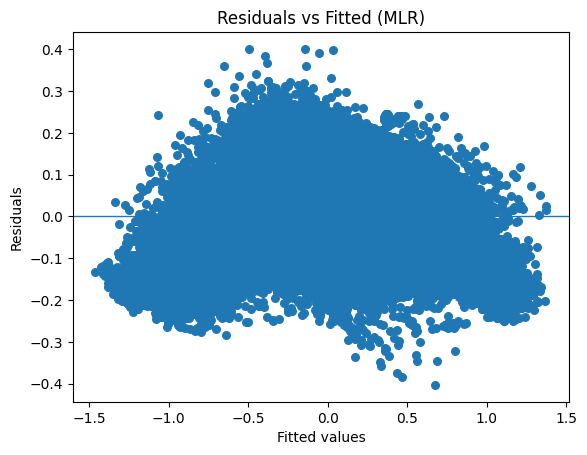

In [13]:
fitted = mlr.fittedvalues
resid = mlr.resid

plt.figure()
plt.scatter(fitted, resid, s=30)
plt.axhline(0, linewidth=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (MLR)"); plt.show()